<a href="https://colab.research.google.com/github/AdolfK12/pytorch-llm/blob/main/Intro_to_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [39]:
# Create a model class that inherits nn.Module
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    # Input layer (4 features of the flower)
    self.fc1 = nn.Linear(in_features, h1) # This line was not indented properly
    self.fc2 = nn.Linear(h1, h2) # This line was not indented properly
    self.out = nn.Linear(h2, out_features) # This line was not indented properly
  # Forward propagation
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [40]:
torch.manual_seed(41)
model = Model()

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [43]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [44]:
my_df['variety']= my_df['variety'].replace('Setosa', 0.0)
my_df['variety']= my_df['variety'].replace('Versicolor' ,1.0)
my_df['variety']= my_df['variety'].replace('Virginica' , 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [45]:
# Train Test Split! Set X, y
X = my_df.drop('variety', axis=1).values
y = my_df['variety'].values

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [48]:
x_train = torch.FloatTensor(X_train)
x_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [49]:
# Set the criteria of model to measure the error
criterion = nn.CrossEntropyLoss()
# Set the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [50]:
# Train our model
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
  if i%10 == 0:
    print(f'Epoch: {i} Loss: {loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 1.1232569217681885
Epoch: 10 Loss: 1.0090826749801636
Epoch: 20 Loss: 0.818040668964386
Epoch: 30 Loss: 0.590877115726471
Epoch: 40 Loss: 0.40858253836631775
Epoch: 50 Loss: 0.27917560935020447
Epoch: 60 Loss: 0.19289323687553406
Epoch: 70 Loss: 0.1375579982995987
Epoch: 80 Loss: 0.10391069948673248
Epoch: 90 Loss: 0.08455776423215866
Epoch: 100 Loss: 0.07334082573652267
Epoch: 110 Loss: 0.06651527434587479
Epoch: 120 Loss: 0.0620645172894001
Epoch: 130 Loss: 0.05895683914422989
Epoch: 140 Loss: 0.05658837407827377
Epoch: 150 Loss: 0.05457479879260063
Epoch: 160 Loss: 0.052497148513793945
Epoch: 170 Loss: 0.05036022886633873
Epoch: 180 Loss: 0.04884034022688866
Epoch: 190 Loss: 0.04758642613887787
Epoch: 200 Loss: 0.04664124920964241
Epoch: 210 Loss: 0.045620501041412354
Epoch: 220 Loss: 0.044957876205444336
Epoch: 230 Loss: 0.044348809868097305
Epoch: 240 Loss: 0.043970268219709396
Epoch: 250 Loss: 0.043344635516405106
Epoch: 260 Loss: 0.04289409890770912
Epoch: 270 Los

Text(0.5, 0, 'Epoch')

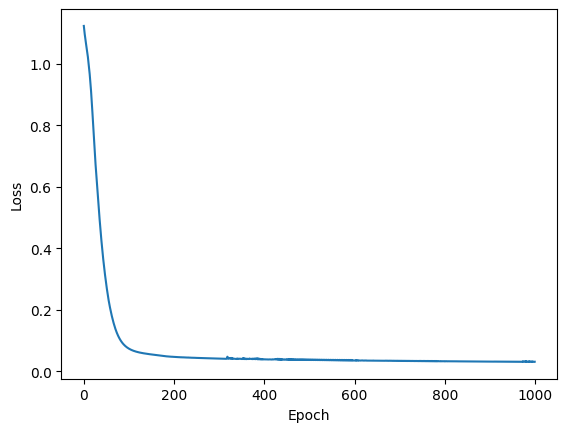

In [51]:
# graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')


In [52]:
# Evaluate model on Test data SET (validate model on test set)
with torch.no_grad():
  y_eval = model.forward(x_test)
  loss = criterion(y_eval, y_test)

In [53]:
loss

tensor(0.0790)

In [54]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)

    print(f'{i+1:2}. {str(data):25} {y_val.argmax().item()}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')
#

 1. tensor([4.8000, 3.4000, 1.9000, 0.2000]) 0
 2. tensor([6.1000, 2.6000, 5.6000, 1.4000]) 2
 3. tensor([5.5000, 2.4000, 3.7000, 1.0000]) 1
 4. tensor([5.8000, 4.0000, 1.2000, 0.2000]) 0
 5. tensor([5.8000, 2.8000, 5.1000, 2.4000]) 2
 6. tensor([5.0000, 2.3000, 3.3000, 1.0000]) 1
 7. tensor([6.4000, 2.8000, 5.6000, 2.1000]) 2
 8. tensor([5.6000, 3.0000, 4.5000, 1.5000]) 1
 9. tensor([5.2000, 2.7000, 3.9000, 1.4000]) 1
10. tensor([5.0000, 3.2000, 1.2000, 0.2000]) 0
11. tensor([5.8000, 2.7000, 5.1000, 1.9000]) 2
12. tensor([5.7000, 4.4000, 1.5000, 0.4000]) 0
13. tensor([7.0000, 3.2000, 4.7000, 1.4000]) 1
14. tensor([6.4000, 3.2000, 4.5000, 1.5000]) 1
15. tensor([7.4000, 2.8000, 6.1000, 1.9000]) 2
16. tensor([5.3000, 3.7000, 1.5000, 0.2000]) 0
17. tensor([6.9000, 3.2000, 5.7000, 2.3000]) 2
18. tensor([6.7000, 3.3000, 5.7000, 2.1000]) 2
19. tensor([6.5000, 3.0000, 5.2000, 2.0000]) 2
20. tensor([6.0000, 2.2000, 4.0000, 1.0000]) 1
21. tensor([5.1000, 3.5000, 1.4000, 0.2000]) 0
22. tensor([5